# Tutorial 1: exploring openface csv files and using the exploface package

#### By B.L. de Vries - 16 July 2018 - v0.0.0.dev1.1

We will use the following standard packages. 
- Pandas to use large tables of data in the form of DataFrames. 
- matplotlib to plot data. 
- pprint to print dictionairies (python native data format) in a nice way.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp

Here are some general documentation websites for the packages used in this tutorial:

- pandas: https://pandas.pydata.org/
- matplotlib: https://matplotlib.org/
- pprint: https://docs.python.org/2/library/pprint.html

Then we also need to import the exploface package. Before you can do this you need to install it. See the readme file in the github repo. (https://github.com/emrecdem/exploface)

In [2]:
import exploface

## Content of the tutorial

1. Loading your openface's output file with pandas: we will inspect the openface output csv file using pandas. We will see how many rows and columns the data has and plot one of the columns.
2. Working with the basic functions of exploface: exploface has some functions to get more basic information and statistics on your openface output file. 
3. Writing out an Elan file using Exploface: here we will see how to output an Elan file for your openface csv file using exploface.

## 1. Loading your openface's output file with pandas

First we will define variables holding the filenames we will be working with. The first is the filename of the video:

In [3]:
video_file = "video.mp4"

We have analysed this video with openface and openface gave this file as output:

In [4]:
openface_file = "video.csv"

We will load and view the csv file from openface using the pandas package. This gives you a DataFrame (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) of the file that we call dataframe_openface_output. A DataFrame is something like a table with information. So it has rows and columns.

In [5]:
dataframe_openface_output = pd.read_csv(openface_file,skipinitialspace=True )

We can view the columns of the dataframe using ".columns". This outputs a dictionairy (https://docs.python.org/2/tutorial/datastructures.html#dictionaries) with columns names. We use prettyprint, pprint (https://docs.python.org/2/library/pprint.html), to nicely output the dictionairy. We also print the number of rows in the dataframe.

In [6]:
pp.pprint(dataframe_openface_output.columns)
"Number of rows: {}".format(len(dataframe_openface_output))

Index(['frame', 'timestamp', 'confidence', 'success', 'gaze_0_x', 'gaze_0_y',
       'gaze_0_z', 'gaze_1_x', 'gaze_1_y', 'gaze_1_z',
       ...
       'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c',
       'AU26_c', 'AU28_c', 'AU45_c'],
      dtype='object', length=431)


'Number of rows: 1121'

Now we know the dataframe has 431 columns and 1121 rows. Lets have a look at the content of the dataframe holding the openface output. We print the first five rows of the DataFrame:

In [7]:
dataframe_openface_output.head(5)

,frame,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0.000000,0.921208,1,0.077684,0.000579,-0.996978,-0.070728,0.022693,-0.997237,...,0,0,1,0,0,1,1,0,0,0
1,2,0.033556,0.926320,1,0.111916,0.032193,-0.993196,-0.061005,0.043572,-0.997186,...,0,0,1,1,0,1,0,0,1,0
2,3,0.067112,0.928005,1,0.118085,0.035448,-0.992371,-0.051068,0.036808,-0.998017,...,0,0,1,1,0,1,1,0,1,0
3,4,0.100667,0.925478,1,0.123202,0.023357,-0.992107,-0.071824,0.051248,-0.996100,...,0,0,1,1,0,1,1,0,1,0
4,5,0.134223,0.923283,1,0.139863,0.043131,-0.989231,-0.077694,0.047579,-0.995841,...,0,0,1,1,0,1,1,0,1,0


We can also specifically look at a few columns, lets try AU06_c and the time:

In [8]:
dataframe_openface_output[["timestamp", "AU06_c"]].head(5)

,timestamp,AU06_c
0,0.000000,0
1,0.033556,0
2,0.067112,0
3,0.100667,0
4,0.134223,0


You can also easily visually inspect the columns of the dataframe by plotting them. Here we plot the AU06 using matplotlib.

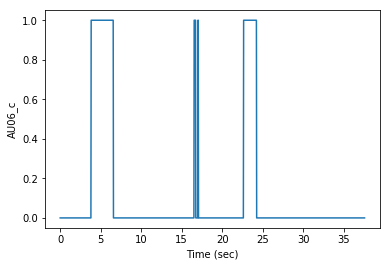

In [9]:
plt.xlabel("Time (sec)")
plt.ylabel("AU06_c")
plt.plot(dataframe_openface_output["timestamp"], dataframe_openface_output["AU06_c"])

## 2. Working with the basic functions of exploface

We have imported exploface and it offers a few functions. You can call these functions using 
```
exploface.function_name(parameter1, parameter2, ...)
```

The first function is ```exploface.get_info(path_to_openface_csv_file)``` and it takes as a parameter a path to an openface output file like we defined as ```openface_file```. So you can call it like this:

In [10]:
exploface.get_info(openface_file)

{'column_names': ['X_65',
  'AU26_c',
  'x_42',
  'X_47',
  'Z_9',
  'AU15_c',
  'pose_Ry',
  'AU25_c',
  'Y_43',
  'y_11',
  '...'],
 'duration': 37.5825,
 'number_of_columns': 431,
 'time_resolution': 0.033555800000000004}

What you get from the function in return is a dictionairy of information about the openface file. It tells you the column_names, duration of the video, number of columns and the time resolution of recording. So with this function you can quickly inspect the properties of the video file and the openface results. We see that the video is roughly 38sec long and has a timestep for the camera frames of 0.034 seconds.

Besides this basic information you want to know a bit more about the openface results in the openface_file. For getting a bit of statisics on the openface output we have the function ```get_statistics```. This function also takes a path to an openface output file like this:

In [30]:
stats_df = exploface.get_statistics(openface_file)
stats_df

,average_length_detection,nr_detections,std_average_length_detection
AU01,0.25,3,0.169706
AU02,0.25,10,0.169706
AU04,0.25,3,0.169706
AU05,0.25,11,0.169706
AU06,0.25,1,0.169706
AU10,0.25,7,0.169706
AU12,0.25,1,0.169706
AU14,0.25,5,0.169706
AU15,0.25,11,0.169706
AU17,0.25,6,0.169706


This function now gives some statistics on the action units detected by openface. It returns this in the form of a pandas DataFrame. So for every AU you see the number of times it got detect, the average duration of a detection and the standard deviation on this duration. This function gives a quick way to see what openface found for different AUs.

We can plot some of the statistics, for example the number of times an AU got detected, in this way:

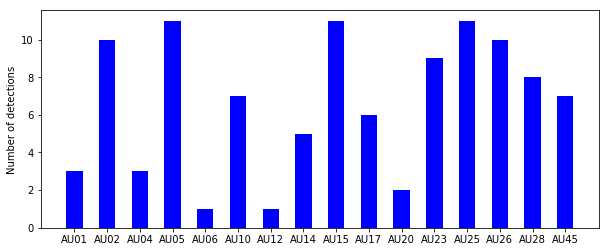

In [29]:
plt.figure(figsize=(10,4))
plt.ylabel("Number of detections")
plt.bar(stats_df.index, stats_df["nr_detections"], 0.5, color="blue")
plt.show()

## Writing out an Elan file using Exploface

With the ```exploface.write_elan_file()``` function you can quickly write out an Elan file. Here we will use the standard settings, in Tutorial 2 we will look at the different settings possible with the ```write_elan_file()``` function. 

You have to specify as parameters the ```openface_file``` and optionally the ```video_file``` and then the ```output_path``` (if you do not give the ```output_path``` no elan file will be written). The output_path specifies the file where you want the elan file to be written to. If you give a ```video_path``` this will be used to directly point elan to the video when you open the elan file in Elan. So when you open elan it will show the annotations and the video. (The link between the elan file and the video file will be broken if you later move these files to different directories in a way that changes their relative path to each other.)

In [31]:
dataframe_timestamp = exploface.write_elan_file(openface_file,
                                                  video_path=video_file,
                                                  output_path="video.eaf",
                        )

You can now open the video.eaf with Elan to inspect the openface output.